#  Peer-to-Peer Personal Loan Data Exploration
## by Zalon Wong

## Investigation Overview

In this investigation, I wanted to learn about what factors affect a borrower's interest rate when getting a loan. These factors include employment status duration	(i.e. the length in months of the employment status at the time the listing was created), borrowers' available bank card credit	(i.e. the total available credit via bank card at the time the credit profile was pulled) and so on. 
## Dataset Overview

This data set from Prosper, which is a peer-to-peer landing platform, contains details of 113,937 loans with 81 variables, including borrower rate (or interest rate), current loan status, borrower income, and many others. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
ploan = pd.read_csv('prosperLoanData.csv')
ploan.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Distribution of Borrower Rate

The borrower rate ranges from 0% to 49.75%. It displays a trend of normal distribution with its peak at 15%. Yet, there are a few strange peaks at approximately 25%, 30% and 35%. 

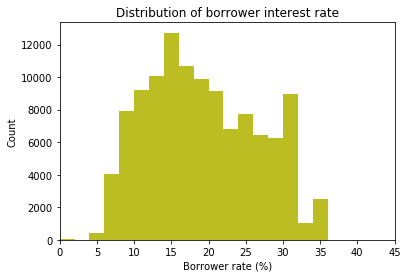

In [21]:
base_color = sb.color_palette()[8]
bin_edge = np.arange(0, ploan.BorrowerRate.max()+0.01, 0.02)

plt.hist(data=ploan, x='BorrowerRate', color=base_color, bins=bin_edge)
xticklocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
xtickmarks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(xticklocs, xtickmarks )

plt.xlabel('Borrower rate (%)')
plt.ylabel('Count')
plt.title ('Distribution of borrower interest rate')
plt.xlim(0, 0.45);

## Distribution of Available Bank Card Credit

Most of Propser users have a total available credit via bank card of 30-40 at the time the credit profile was pulled. A  right skwed relationship is demonstrated. 

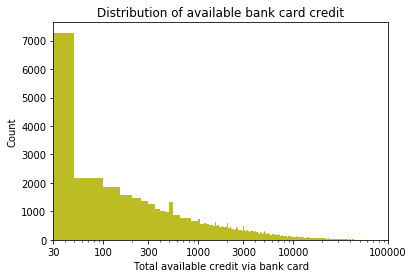

In [27]:
bin_edge = np.arange(0, ploan.AvailableBankcardCredit.max()+50, 50)

plt.hist(data=ploan, x='AvailableBankcardCredit', color=base_color, bins=bin_edge)

plt.xscale('log')
ticks_loc = [30, 100, 300, 1000, 3000, 10000, 100000, 1000000]
plt.xticks(ticks_loc, ticks_loc)

plt.xlabel('Total available credit via bank card')
plt.ylabel('Count')
plt.title ('Distribution of available bank card credit')
plt.xlim(0, 100000);

## Distribution of Stated Monthly Income

Most of Propser users stated that their monthly income was between \\$3000 and \\$5000. While some users are not making any money, highest reported monthly income was \\$1.8 million. 


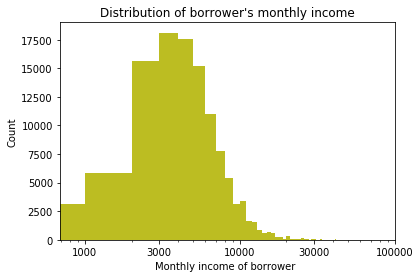

In [24]:
bin_edge = np.arange(0, ploan.StatedMonthlyIncome.max()+500,1000 ) 


plt.hist(data=ploan, x='StatedMonthlyIncome', bins=bin_edge, color=base_color)
plt.xscale('log')
ticks_loc = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
plt.xticks(ticks_loc, ticks_loc)

plt.xlabel('Monthly income of borrower ')
plt.ylabel('Count')
plt.title ("Distribution of borrower's monthly income")
plt.xlim(0, 100000);


## Does borrowers' bank card credit and monthly income affect their loan rate? 

I removed the ouliter in both plots and found the negative correlation between bank card credit, monthly income and loan interest rate. However, the trend is not very clear -- we need the regression line to hint us!

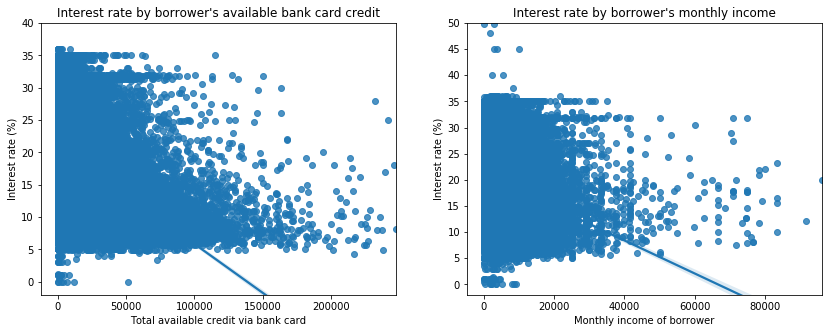

In [33]:
plt.figure(figsize=[14,5])

plt.subplot(1, 2, 1)
no_out_ploan = ploan.query('AvailableBankcardCredit < 250000')
no_out_ploan

sb.regplot(data=no_out_ploan, x='AvailableBankcardCredit', y='BorrowerRate')
plt.xlabel('Total available credit via bank card')
plt.ylabel('Interest rate (%)')
yticklocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
ytickmarks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
plt.yticks(yticklocs, ytickmarks )
plt.title ("Interest rate by borrower's available bank card credit")
plt.ylim(-0.02, 0.4);


plt.subplot(1, 2, 2)
no_out_ploan1 = ploan.query('StatedMonthlyIncome < 100000')
no_out_ploan1

sb.regplot(data=no_out_ploan1, x='StatedMonthlyIncome', y='BorrowerRate')
plt.xlabel('Monthly income of borrower')
plt.ylabel('Interest rate (%)')
yticklocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
ytickmarks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.yticks(yticklocs, ytickmarks )
plt.title ("Interest rate by borrower's monthly income")
plt.ylim(-0.02, 0.5);

## Maximum interest rate by borrowers' bank card credit

Although the trends are not very clear, it inspired me to look at whether borrowers' bank card credit may affect their maximum interest rate. Of course, every borrower wants a lower rate. So it's good toknow what make the interest rate high! The maximum interest rate is lower when a borrower's bank card credit is higher.


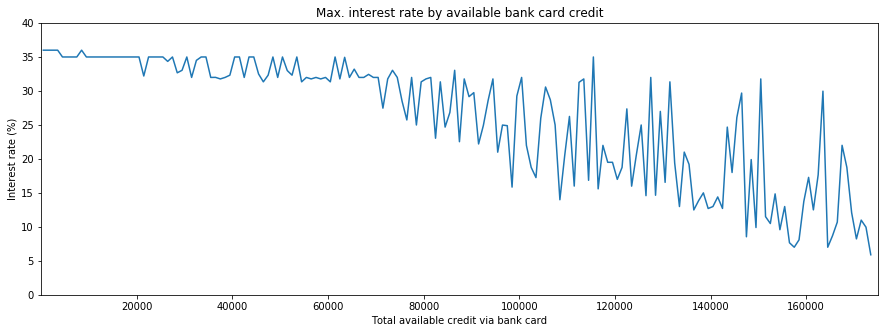

In [36]:
# available bank card credit (X) vs. borrower rate (Y)
# set bin edges, compute center
bin_size = 1000
xbin_edges = np.arange(0, ploan.AvailableBankcardCredit.max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute max and min of borrower rate in each bin
data_xbins = pd.cut(ploan['AvailableBankcardCredit'], xbin_edges, right=False, include_lowest=True)
y_max = ploan['BorrowerRate'].groupby(data_xbins).max()

plt.figure(figsize=[15,5])
plt.errorbar(x=xbin_centers, y=y_max)
plt.xlim(1,175000)
plt.title('Max. interest rate by available bank card credit')
plt.xlabel('Total available credit via bank card')
plt.ylabel('Interest rate (%)')

yticklocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
ytickmarks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
plt.yticks(yticklocs, ytickmarks );

## Does home ownership affect this relationship?
The negative correlation between maximum borrower rate and available bank car credit is displayed for both home owners and non-home owners. When I introduce the factor of home ownership, it doesnt seem to show an explicit relationship. However, if we pay more attention, it seems that a negative effect is brought by home ownership, where the maximum interest rate starts to drop earlier available bank credit increases and dives deeper for non-home owners. 

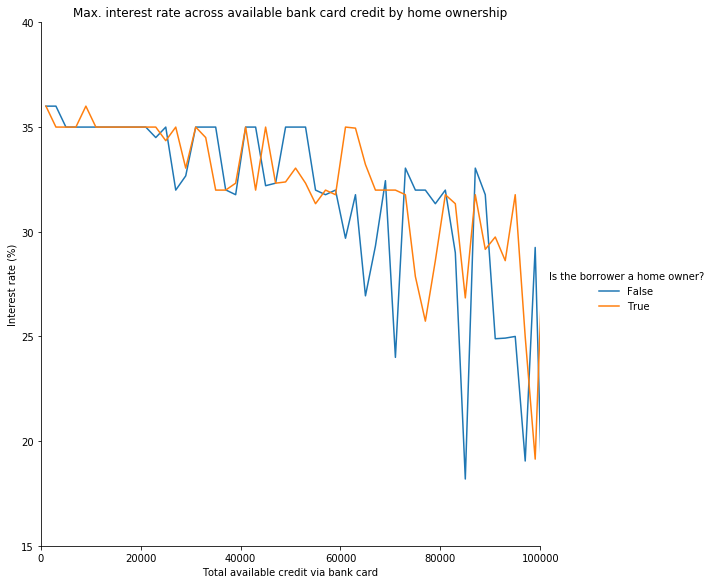

In [39]:
# max BorrowerRate (Y) vs AvailableBankcardCredit (X) by IsBorrowerHomeowner

def mean_poly(x, y, bins=10, **kwargs):
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.lim(), x.max(), bins+1)
    bin_centers = (xbin_edges[1:] + xbin_edges[:-1]) / 2
    
    # compute counts
    data_bins = pd.cut(x, bins, right=False, include_lowest=True)
    maxs = y.groupby(data_bins).max()
    
    # create plot
    plt.errorbar(x=bin_centers, y=maxs, **kwargs)

# set bin edges, compute center
bin_size = 2000
xbin_edges = np.arange(0, ploan.StatedMonthlyIncome.max()+bin_size, bin_size)

g = sb.FacetGrid(data=ploan, hue='IsBorrowerHomeowner', size=8)
g.map(mean_poly, 'AvailableBankcardCredit', 'BorrowerRate', bins=xbin_edges)

plt.xlim(0,100000)
plt.ylim(0.15, .4)
plt.title('Max. interest rate across available bank card credit by home ownership')
plt.xlabel('Total available credit via bank card')
plt.ylabel('Interest rate (%)')

yticklocs = [ 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
ytickmarks = [ 15, 20, 25, 30, 35, 40]
plt.yticks(yticklocs, ytickmarks );
g.add_legend(title='Is the borrower a home owner?');


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!